#Atividade
 
 
*   Entregar um documento do Google com uma análise superficial sobre um conjunto de dados da base UCI, que não seja a IRIS, voltado para classificação. Esse conjunto poderá ser utilizado nas suas atividades de presença daqui por diante. Destacar a necessidade ou não de transformação, redução de espaço, complementação dos dados, descarte de dados, mostrar formas diferentes de visualização dos dados e dos resultados. Apontar as possíveis técnicas a serem empregadas.

#### 1.   *Importações dos módulos gerais*

    * Aqui serão importados o numpy, o pandas e o matplotlib/seaborn para plots




In [2]:
# This is not strictly for a Python rather. 
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()                         #Configura os plots do matplotlib para terem os mesmos estilos do seaborn
sns.set_style("whitegrid")        #Alterando o estilo do plot para melhor vizualização no colab (Tema escuro fica ruim de ver o fundo)

    *  Aqui serão importados os módulos do sklearn para realizar o K-Nearest Neighbors



In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#### 2.   Leitura dos Datasets
      *   O dataset "Adult income"
      *   O dataset será retirado de um repositório pessoal do GITHUB


O dataset se trata do estudo dos fatores que resultam se a renda anual de um indivíduo é menor ou maior a $50000. Intuitivamente, a renda é influenciada pelo nível de educação do indivíduo, idade, sexo, ocupação e etc.

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/Berawecker/Datasets/main/adult.csv')
 
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### 3.   Limpeza dos dados

O dataset possui alguns dados que não podem ser utilizados para a classificação. O exemplo neste dataset é o caractere "?" que pode ser observado em certos locais. Será substituido o caractere "?" por um "np.nan" devido a facilidade maior de tratar dados faltantes.

In [6]:
data = data.replace("?", np.nan)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

É possivel perceber como existem uma quantidade expressiva de dados faltantes no dataset, além do mais, todos os dados faltantes pertecem a colunas de dados categoricos. Existem várias maneiras de tratar esses dados como preenchimento usando moda por exemplo, mas o que será utilizado aqui será a remoção das linhas que possuem estes dados faltantes. 

In [8]:
data.dropna(how = 'any',inplace = True)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Teve-se uma redução de 3620 linhas (≈ 7.41%) após a remoção dos dados dados faltantes. Apesar de ser uma quantidade expressiva, foi decidido que seria melhor visto que dados categoricos carregam informações descritivas sobre a pessoa. Preferiu-se então remover os dados como um todo da pessoa.

#### 4.   Visualização dos dados brutos

      *   Aqui serão mostrados dados do dataset sem serem feitas nenhuma modificação além da limpeza dos dados.

In [9]:
data.astype('object').describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,74,7,26741,16,16,7,14,6,5,2,121,97,96,41,2
top,36,Private,203488,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
freq,1283,33307,21,14783,14783,21055,6020,18666,38903,30527,41432,43082,21358,41292,34014


O describe mostra informações das variáveis do dataframe, mas somente dos dados numéricos, para mostrar os dos dados categoricos se mostrou necessário transformar todos para o mesmo tipo. Com esta tabela é possivel ver quantas categorias diferentes os dados possuem, alêm da quantidade de vezes e qual a categorial com maior frequência.

In [10]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Com este describe vê-se mais informações dos dados numéricos do dataset. Aqui pode-se ver por exemplo que a idade média é 38.54, o valor minimo e o valor maximo dos atributos, ou que todos os dados diferentes de 0 das colunas "capital-gain" e "capital-loss" estão entre os percentis 75% e 100%.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Adult Income dataset')

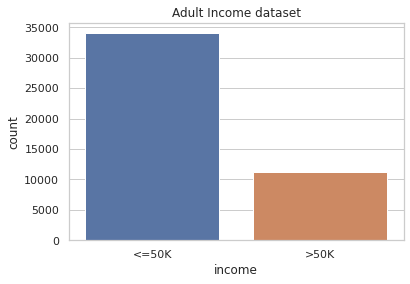

In [11]:
sns.countplot(data['income']).set_title("Adult Income dataset")

In [14]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

As classes desse dataset são altamente desbalanceadas visto que  a classe "<=50k" é mais de 3 vezes maior que a classe ">50k"

Text(0.5, 1.0, 'Matriz de correlação do Adult income')

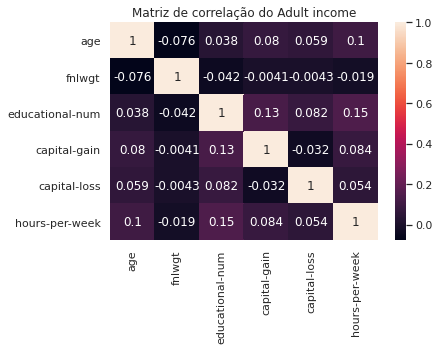

In [15]:
sns.heatmap(data.corr(), color = 'k', annot = True).set_title("Matriz de correlação do Adult income")

com a matriz de correlação dos dados numéricos, é possivel perceber o quão os dados são não-correlacionados visto que nenhum dado têm um bom fator de correlação com algum outro dado.

Text(0.475, 1.01, 'Pairplot do dataset Adult Income')

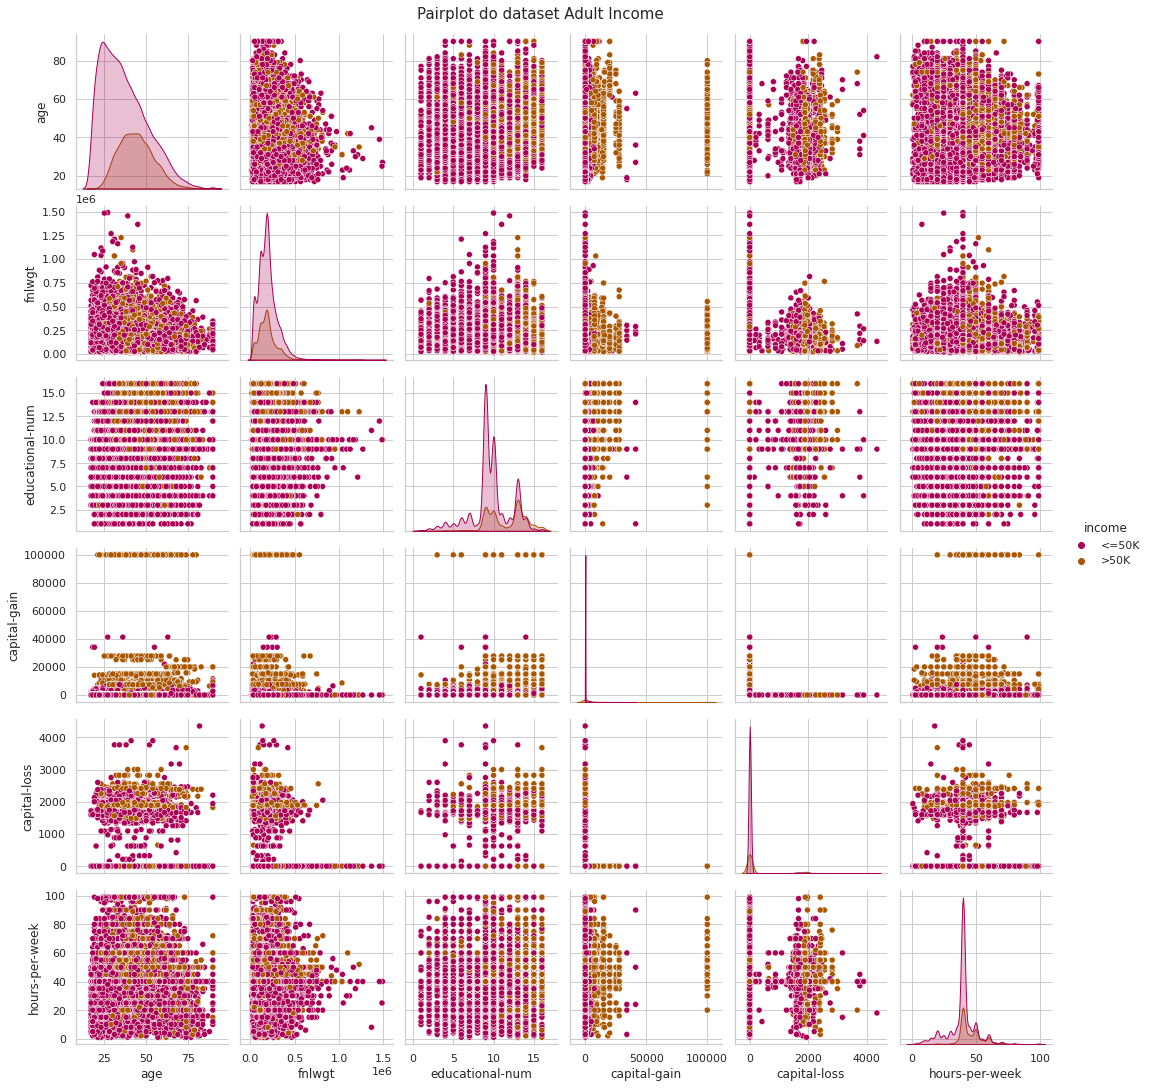

In [25]:
#pair_plot = sns.pairplot(data, hue = "income", palette = "brg")
#pair_plot.fig.suptitle("Pairplot do dataset Adult Income", fontsize = 15, x = 0.475, y = 1.01)

Com o pairplot, vê-se como as informações da matriz de correlação são. Quase não há relação entre os dados e o que há pode ser dito como uma casualidade devido a quantidade elevada de dados.

#### 5.   Redução do espaço

Devido a alta dimensionalidade do dataset, seria interessante realizar um PCA dos dados para reduzir a quantidade de atributos numéricos utilizados para treinar o algoritmo. Talvez descorrelacionar ainda mais os dados pode ser beneficente para o algoritmo de classificação.
